In [3]:
import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
 # Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#Twitter API keys

consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
#Get tweets from each news organization's twitter feeds.

In [4]:
# As with many for loops, we will start with an empty list.  The For Loop will fill it up once the iteration is complete.

sentiments = []

#defining our target users. 

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Set Counter  

    counter = 0
    
   #Get all all tweets for each news outlet's homepage.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Vader/Sentiment analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #appending the data obtained. 

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter to continue the iteration.

        counter = counter + 1
#Convert our dictionary into a dataframe. 

newsoutlet_sentiments = pd.DataFrame.from_dict(sentiments)
print(newsoutlet_sentiments)

     Compound                            Date  Negative  Neutral  Positive  \
0      0.0000  Tue Sep 04 19:31:06 +0000 2018     0.000    1.000     0.000   
1      0.9054  Tue Sep 04 19:03:06 +0000 2018     0.000    0.615     0.385   
2     -0.1195  Tue Sep 04 18:32:01 +0000 2018     0.198    0.619     0.183   
3     -0.3400  Tue Sep 04 18:06:10 +0000 2018     0.188    0.684     0.128   
4      0.6240  Tue Sep 04 16:06:05 +0000 2018     0.000    0.786     0.214   
5     -0.5423  Tue Sep 04 13:07:03 +0000 2018     0.200    0.800     0.000   
6      0.5994  Tue Sep 04 12:51:26 +0000 2018     0.000    0.794     0.206   
7      0.3612  Tue Sep 04 12:36:34 +0000 2018     0.000    0.884     0.116   
8      0.0000  Tue Sep 04 12:16:24 +0000 2018     0.000    1.000     0.000   
9      0.0000  Tue Sep 04 12:00:20 +0000 2018     0.000    1.000     0.000   
10    -0.5216  Tue Sep 04 11:11:08 +0000 2018     0.183    0.817     0.000   
11    -0.3182  Tue Sep 04 10:20:54 +0000 2018     0.197    0.674

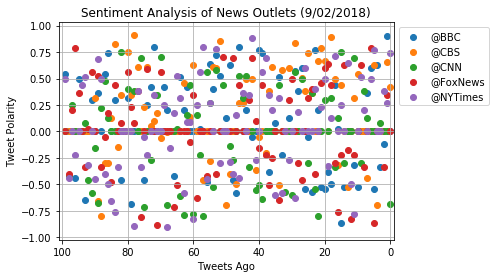

In [6]:
#writing the dataframe to a CSV. 
newsoutlet_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

# Set amount to 100,
plt.xlim(101, -1)

#using a for loop to create a scatter plot.  
for user in target_users:
    dataframe = newsoutlet_sentiments.loc[newsoutlet_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Legend 
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of News Outlets (9/02/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of News Outlets")
plt.show()

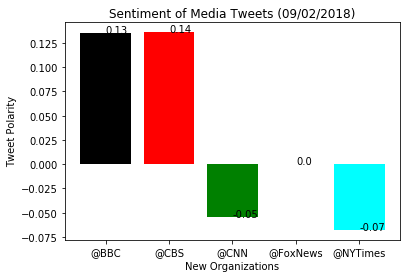

In [33]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['black', 'red', 'green', 'blue', 'cyan'])
#Set title, x axis label, and y axis label.
plt.title("Sentiment of Media Tweets (09/02/2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()